# Modeling 

- Further problems -> Thresholding?
- Evalution of normel behaviour

# TODO:
Different Algorithms, Grid search, remeber train data is supposed to have no anomalies, test data has and we know it already 
Consider validierungsset ! Also: train with test data and then predict train
Calculate the amount of anomlous data percentage



### Idea
Feed with dostributions to detect anomal behaviour, What is normal behaviour - from a statistical ppoint of view 
adapating the threshold, if a certain threshold is reached the data doesn't follow normal distribution

In [17]:
#Imports
import pandas as pd
import numpy as np
from helpers import *

from sklearn.decomposition import PCA

from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
import warnings  
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [18]:
# Load in data 
train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/train.pkl")
#train = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/scaled/train_standard.pkl")
test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/test.pkl")
#test = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/scaled/test_standard.pkl")
validation = pd.read_pickle("/Users/janavihs/projects/anomaly-detection-software/data/interim/raw/validation.pkl")

In [19]:
# Split and encode Data for modelling and evaluation
validation = encode(validation)
test = encode(test)
train = encode(train)
y_true_train = create_y_values(train)
y_true_test = create_y_values(test)
y_true_validation = create_y_values(validation)
X_train = select_columns_for_modelling(train)
X_test = select_columns_for_modelling(test)
X_validation = select_columns_for_modelling(validation)

## Isolation Forest
- uses tree-based approach to isolate anomalies after modelling itself on "normal" data in an unsupervised fashion.
https://www.projectpro.io/article/anomaly-detection-using-machine-learning-in-python-with-example/555#mcetoc_1fqgmt45ri


# Train Data 

In [31]:
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.0001, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X_train)
pred = clf.predict(X_train)
score = clf.decision_function(X_train)
train['anomaly']=pred
train['score'] = score
outliers=train.loc[train['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(train['anomaly'].value_counts())

TypeError: __init__() got an unexpected keyword argument 'behaviour'

In [21]:
pred = clf.predict(X_validation)
score = clf.decision_function(X_validation)
validation['anomaly']=pred
validation['score'] = score
outliers=validation.loc[validation['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(validation['anomaly'].value_counts())

1    2603
Name: anomaly, dtype: int64


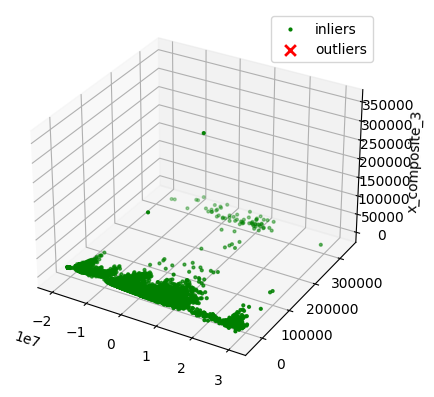

In [523]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
#scaler = StandardScaler()
#normalize the metrics
X = train[to_model_columns]
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

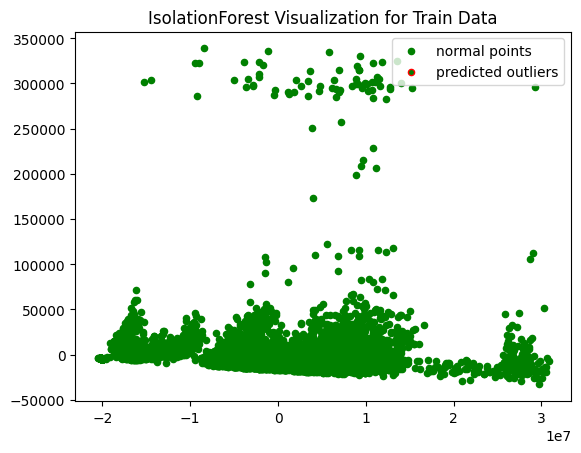

In [524]:
pca = PCA(2)
pca.fit(train[to_model_columns])
res=pd.DataFrame(pca.transform(train[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest Visualization for Train Data")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

# Test Data

In [525]:
to_model_columns=test.columns[1:6]
test.reset_index(inplace=True)
pred = clf.predict(test[to_model_columns])
score = clf.decision_function(test[to_model_columns])
test['score'] = score
test['anomaly']=pred
outliers=test.loc[test['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(test['anomaly'].value_counts())

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[int64]'>)

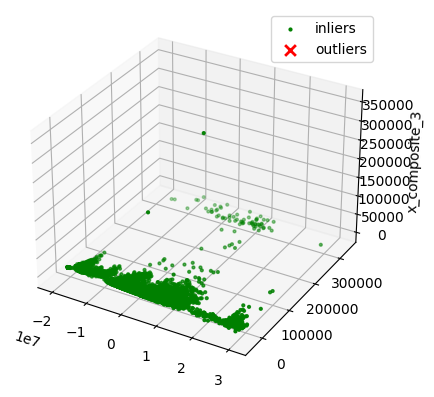

In [490]:
pca = PCA(n_components=3)  # Reduce to k=3 dimensions
#normalize the metrics
X_reduce = pca.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3")
# Plot the compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=4, lw=1, label="inliers",c="green")
# Plot x's for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

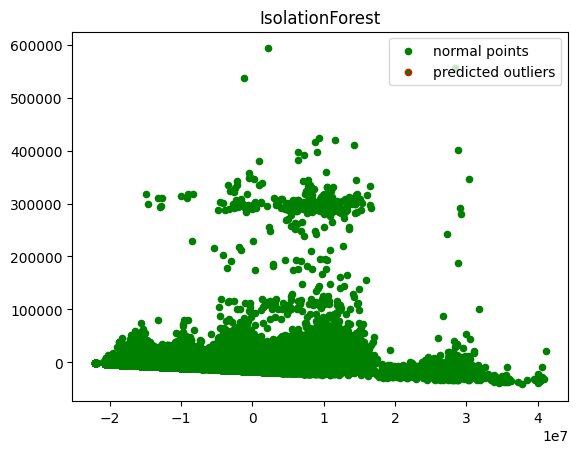

In [491]:
pca = PCA(2)
pca.fit(test[to_model_columns])
res=pd.DataFrame(pca.transform(test[to_model_columns]))
Z = np.array(res)
plt.title("IsolationForest")
plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(res[0], res[1], c='green',
                 s=20,label="normal points")
b1 =plt.scatter(res.iloc[outlier_index,0],res.iloc[outlier_index,1], c='green',s=20,  edgecolor="red",label="predicted outliers")
plt.legend(loc="upper right")
plt.show()

## Calculation of Confusion Matrix 

As we have access to the labels we can evaluate the algorithm with the labels

In [495]:
# Caluclation of Confusion Matrix 
y_true_test = test[test['exploit']== True]
# encode boolean values
test["exploit"] = test["exploit"].astype(int) # false = 0, true = 1
train["exploit"] = train["exploit"].astype(int)
y_true_test = test['exploit']
y_pred_test = test['anomaly'] # -1 = anomaly, 1 = normal
y_pred_test = y_pred_test.mask(y_pred_test == 1, 0) # now 0 = normal
y_pred_test=  y_pred_test.mask(y_pred_test == -1, 1) # now 1 = anomaly
y_true_test = pd.Series(y_true_test.values, name='Actual')
y_pred_test = pd.Series(y_pred_test.values, name='Predicted')
df_confusion = pd.crosstab(y_true_test, y_pred_test)
df_confusion

Predicted,0
Actual,
0,34621
1,5306


In [493]:
df_confusion = pd.crosstab(y_true_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,All
Actual,,
0,34621,34621
1,5306,5306
All,39927,39927


In [502]:
# Caluclation of Confusion Matrix 
y_true_test = test['exploit']
# encode boolean values
test["exploit"] = test["exploit"].astype(int) # false = 0, true = 1
train["exploit"] = train["exploit"].astype(int)
y_true_train = train['exploit']
y_true_test = test['exploit']
y_pred_test = test['anomaly'] # -1 = anomaly, 1 = normal
y_pred_test = y_pred_test.mask(y_pred_test == 1, 0) # now 0 = normal
y_pred_test=  y_pred_test.mask(y_pred_test == -1, 1) # now 1 = anomaly
y_true_test = pd.Series(y_true_test.values, name='Actual')
y_pred_test = pd.Series(y_pred_test.values, name='Predicted')
df_confusion = pd.crosstab(y_true_test, y_pred_test)
df_confusion

Predicted,0
Actual,
0,34621
1,5306


In [496]:
def classify_anomalies(df, feature):
    df['feature_name'] = feature
  
    df.sort_values(by='timestamp', ascending=False)

    #    #Categorise anomalies as 0-no anomaly, 1- low anomaly , 2 - high anomaly
    df['anomaly'].loc[df['anomaly'] == 1] = 0
    df['anomaly'].loc[df['anomaly'] == -1] = 2
    df['anomaly_class'] = df['anomaly']
    max_anomaly_score = df['score'].loc[df['anomaly_class'] == 2].max()
    print('Maximaler Anomaly Score for {0}: '.format(feature)) 
    print(max_anomaly_score)
    medium_percentile = df['score'].quantile(0.24)
    print('Medium Percentile for {0}: '.format(feature)) 
    print(medium_percentile)
    df['anomaly_class'].loc[(df['score'] > max_anomaly_score) & (df['score'] <= medium_percentile)] = 1
    return df

In [413]:
for i in range(1, len(train[to_model_columns].columns)-1):
    clf.fit(train.iloc[:,i:i+1])
    pred = clf.predict(train.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['timestamp']=train['timestamp']
    test_df['score']=clf.decision_function(train.iloc[:,i:i+1])
    #print(test_df)
    test_df['actuals']=train.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    train_df=classify_anomalies(test_df,train.columns[i])



Maximaler Anomaly Score for cpu_usage: 
nan
Medium Percentile for cpu_usage: 
0.3307921975545831
Maximaler Anomaly Score for memory_usage: 
-0.0009912320568110644
Medium Percentile for memory_usage: 
0.27755933736457966
Maximaler Anomaly Score for network_received: 
nan
Medium Percentile for network_received: 
0.310579489634255


In [415]:
for i in range(1, len(test[to_model_columns].columns)-1):
    clf.fit(train.iloc[:,i:i+1])
    pred = clf.predict(test.iloc[:,i:i+1])
    test_df=pd.DataFrame()
    test_df['timestamp']=test['timestamp']
    test_df['score']=clf.decision_function(test.iloc[:,i:i+1])
    #print(test_df)
    test_df['actuals']=test.iloc[:,i:i+1]
    test_df['anomaly']=pred
    #Get the indexes of outliers in order to compare the metrics     with use case anomalies if required
    outliers=test_df.loc[test_df['anomaly']==-1]
    outlier_index=list(outliers.index)
    test_df=classify_anomalies(test_df,test.columns[i])

Maximaler Anomaly Score for cpu_usage: 
nan
Medium Percentile for cpu_usage: 
0.32718770448478685
Maximaler Anomaly Score for memory_usage: 
-0.0009912320568110644
Medium Percentile for memory_usage: 
0.25444307808563926
Maximaler Anomaly Score for network_received: 
nan
Medium Percentile for network_received: 
0.2971442717193947


# Mass Volume Curve Integrieren 
TODO: Verschiedene Algorithmen ausprobieren 
Contamination Rate aktuell bei 0.001
Performance Evaluerien 
Grid Search
Test Set als Benchmark irgendwie verwenden da exploit wissen vorhanden? Metriken? Martin ?

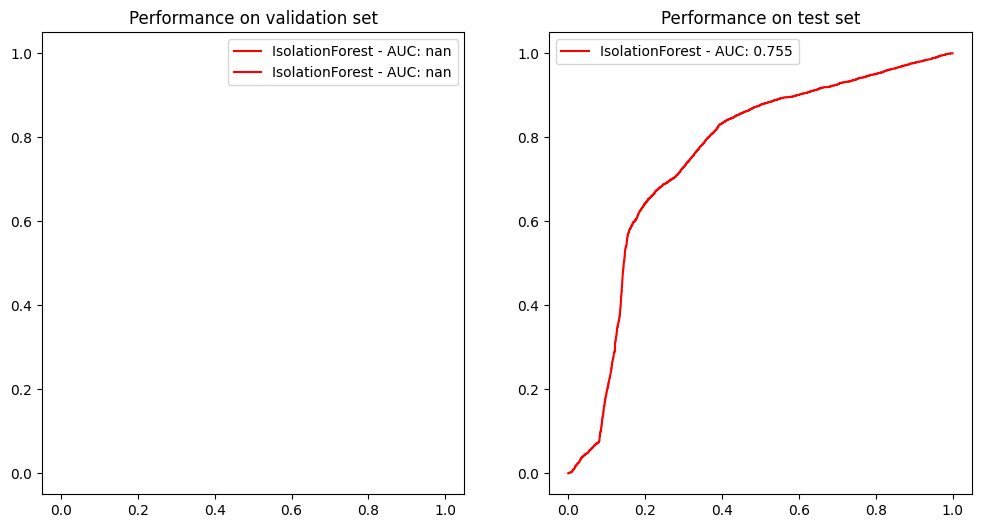

In [29]:
algorithms = [IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)]
name = ['IsolationForest']
colors = ['red']

plt.figure(figsize=(12, 6))
for a, algo in enumerate(algorithms):
    algo.fit(X_train)
    algo_train = algo.decision_function(X_train)
    algo_test = algo.decision_function(X_test)
    algo_validation = algo.decision_function(X_validation)

    # as only one class available auc does not work -> Brier Score!
    fpr_train_, tpr_train_, _ = roc_curve(y_true_train, -algo_train)
    algo_auc_train = auc(fpr_train_, tpr_train_)
    
    fpr_test_, tpr_test_, _ = roc_curve(y_true_test, -algo_test)
    algo_auc_test = auc(fpr_test_, tpr_test_)

    # as only one class available auc does not work -> Brier Score!
    fpr_validation_, tpr_validation_, _ = roc_curve(y_true_validation, -algo_validation)
    algo_auc_validation = auc(fpr_validation_, tpr_validation_)

    plt.subplot(1, 2, 1)
    plt.title('Performance on Training set')
    plt.plot(fpr_train_, tpr_train_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_train))
    
    plt.subplot(1, 2, 2)
    plt.title('Performance on Test set')
    plt.plot(fpr_test_, tpr_test_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_test))
    
    plt.subplot(1, 2, 1)
    plt.title('Performance on Validation set')
    plt.plot(fpr_validation_, tpr_validation_, color=colors[a], label= '{0} - AUC: {1:.3f}'.format(name[a], algo_auc_validation))
    
    
plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 2)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.subplot(1, 2, 1)
plt.legend(loc=0)
plt.xlim((-0.05, 1.05))
plt.ylim((-0.05, 1.05))

plt.show()